# Question 2

##### Find $A$, $A^{-1}$, and $\textbf{x}$ for the above system of equations. Confirm that your answer matches that of Question 1.

In [ ]:
C = np.matrix([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]])
b = np.array([[40], [30], [30], [20]])
A = 4 * np.identity(4) - C
print("A =")
Matrix(A)

A =


Matrix([
[ 4.0, -1.0, -1.0,  0.0],
[-1.0,  4.0,  0.0, -1.0],
[-1.0,  0.0,  4.0, -1.0],
[ 0.0, -1.0, -1.0,  4.0]])

In [ ]:
A_inv = np.linalg.inv(A)
print("Inverse of A =")
Matrix(A_inv)

Inverse of A =


Matrix([
[ 0.291666666666667, 0.0833333333333333, 0.0833333333333333, 0.0416666666666667],
[0.0833333333333333,  0.291666666666667, 0.0416666666666667, 0.0833333333333333],
[0.0833333333333333, 0.0416666666666667,  0.291666666666667, 0.0833333333333333],
[0.0416666666666667, 0.0833333333333333, 0.0833333333333333,  0.291666666666667]])

In [ ]:
x = A_inv * b
print("x =")
Matrix(x)

x =


Matrix([
[17.5],
[15.0],
[15.0],
[12.5]])

# Question 3
##### Suppose that the external temperature at the top of the plate changes to $50^{\circ}$. Use results from Question 2 to find the new equilibrium temperature distribution. 

In [ ]:
b = np.array([[60], [50], [30], [20]])
x = A_inv * b
print("x =")
Matrix(x)

x =


Matrix([
[25.0],
[22.5],
[17.5],
[15.0]])

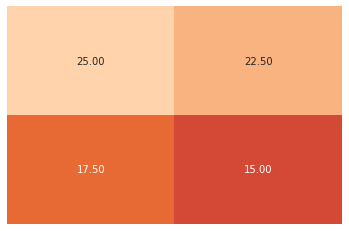

In [ ]:
plotTemp(2, x)

# Question 4
##### Do an LU decomposition of $A$ above. Use it to solve the original system and the system with altered external temperatures. Confirm your earlier results. 

The code below shows the matrix L in the LU factorization.

In [ ]:
L, U = spla.lu(A, permute_l=True)
print("L =")
Matrix(L)

L =


Matrix([
[  1.0,                 0.0,                0.0, 0.0],
[-0.25,                 1.0,                0.0, 0.0],
[-0.25, -0.0666666666666667,                1.0, 0.0],
[  0.0,  -0.266666666666667, -0.285714285714286, 1.0]])

The code below shows the matrix U in the LU factorization.

In [ ]:
print("U =")
Matrix(U)

U =


Matrix([
[4.0, -1.0,             -1.0,               0.0],
[0.0, 3.75,            -0.25,              -1.0],
[0.0,  0.0, 3.73333333333333, -1.06666666666667],
[0.0,  0.0,              0.0,  3.42857142857143]])

The code below solves the original system using LU factorization.

In [ ]:
b1 = np.array([[40], [30], [30], [20]])
y1 = np.linalg.solve(L, b1)
x1 = np.linalg.solve(U, y1)
print("x =")
Matrix(x1)

x =


Matrix([
[17.5],
[15.0],
[15.0],
[12.5]])

The code below solves the altered system using LU factorization.

In [ ]:
b2 = np.array([[60], [50], [30], [20]])
y2 = np.linalg.solve(L, b2)
x2 = np.linalg.solve(U, y2)
print("x =")
Matrix(x2)

x =


Matrix([
[25.0],
[22.5],
[17.5],
[15.0]])

# Question 5
##### A finer grid should give a better approximation of the equilibrium temperatures. Consider the grid in Figure 3 on the following page. Now there are 25 grid points inside the plate, so we now have a system of 25 equations in 25 unknowns. The matrix $C$ and the vector $\textbf{b}$ below apply to this situation.

##### Find the temperature distribution in this case with the original external temperatures by either finding $(4I-C)^{-1}$ or by using the LU factorization.

In [ ]:
C = np.array([
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])
Matrix(C)

Matrix([
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

In [ ]:
b = np.array([40, 30, 30, 30, 30, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 30, 20, 20, 20, 20])
Matrix(b)

Matrix([
[40],
[30],
[30],
[30],
[30],
[10],
[ 0],
[ 0],
[ 0],
[ 0],
[10],
[ 0],
[ 0],
[ 0],
[ 0],
[10],
[ 0],
[ 0],
[ 0],
[ 0],
[30],
[20],
[20],
[20],
[20]])

In [ ]:
I_twenty_five = np.identity(25)
A = 4 * I_twenty_five - C
print('x = ')
x = np.linalg.solve(A, b)
Matrix(x)

x = 


Matrix([
[19.3737373737374],
[22.4013209013209],
[22.6557886557887],
[20.6639471639472],
[            15.0],
[15.0936285936286],
[17.5757575757576],
[17.5578865578866],
[            15.0],
[9.33605283605284],
[13.4250194250194],
[15.2501942501942],
[            15.0],
[12.4421134421134],
[7.34421134421135],
[13.3562548562549],
[            15.0],
[14.7498057498058],
[12.4242424242424],
[ 7.5986790986791],
[            15.0],
[16.6437451437451],
[16.5749805749806],
[14.9063714063714],
[10.6262626262626]])

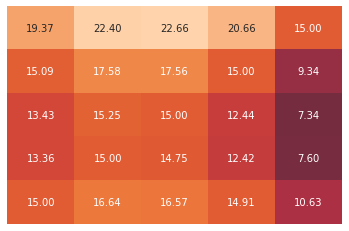

In [ ]:
plotTemp(5, x)